# Telecom Churn case Study

### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### 1. Data understanding and cleaning

In [2]:
# Let's import the necessary libraries now

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Below is the code so that we can look into each and every column to understand the data

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the csv file

telecom = pd.read_csv("telecom_churn_data.csv")

In [4]:
# Looking at the data

telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
# checking shape of data

telecom.shape

(99999, 226)

In [6]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
# Calculating the 70th percentile of average total recharge amount for 6 and 7 months

average = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2
percentile_70 = np.percentile(average , 70)
percentile_70

368.5

#### Filtering high value customers

In [8]:
# Filtering out the high profile customers

telecom_high = telecom[average >= percentile_70]

In [9]:
telecom_high.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN

In [10]:
# Checking the shape of new dataframe

telecom_high.shape

(30011, 226)

In [11]:
# Let's check the null value percentage now

print(100 * telecom_high.isnull().sum() / len(telecom_high))

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.379861
std_og_t2o_mou               0.379861
loc_ic_t2o_mou               0.379861
last_date_of_month_6         0.000000
last_date_of_month_7         0.103295
last_date_of_month_8         0.523142
last_date_of_month_9         1.199560
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  1.052947
onnet_mou_7                  1.009630
onnet_mou_8                  3.125521
onnet_mou_9                  5.677918
offnet_mou_6                 1.052947
offnet_mou_7                 1.009630
offnet_mou_8                 3.125521
offnet_mou_9                 5.677918
roam_ic_mou_6                1.052947
roam_ic_mou_7                1.009630
roam_ic_mou_8                3.125521
roam_ic_mou_9                5.677918
roam_og_mou_6                1.052947
roam_og_mou_

We can see that there are various columns with null values and some have even greater percentage of null values. Let's drop the columns with null value percentage greater than 50%.

In [12]:
null_columns = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9',
                'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6',
                'max_rech_data_7','max_rech_data_8','max_rech_data_9','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
                'count_rech_2g_9','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9','av_rech_amt_data_6',
                'av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','night_pck_user_6','night_pck_user_7','night_pck_user_8',
                'night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

telecom_high.drop(null_columns,inplace=True,axis=1)

In [13]:
telecom_high.shape

(30011, 186)

#### Let's tag the churners now based on the month 9 activities

We will use the following attributes to tag churners into seperate column called 'churn'
 
 - total_ic_mou_9

 - total_og_mou_9

 - vol_2g_mb_9

 - vol_3g_mb_9


In [14]:
# Tagging Churners

def tag_churn(x):
    if x['total_ic_mou_9'] == 0 or x['total_og_mou_9'] == 0 and x['vol_2g_mb_9'] == 0 and x['vol_3g_mb_9'] == 0:
        return 1
    else:
        return 0
    
telecom_high['churn']  = telecom_high.apply(tag_churn,axis=1)

In [15]:
telecom_high.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,

In [16]:
# Let's calculate the churn rate

churn = (sum(telecom_high['churn'])/len(telecom_high['churn'].index))*100
churn

10.51281196894472

After the 'churn' column is created we need to drop all the 9 month columns as we don't need them now.

In [17]:
# Checking the columns

print(telecom_high.columns.values.tolist())

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou

In [18]:
# Removing _9 columns

columns_9 = ['last_date_of_month_9','arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9',
             'loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9','std_og_t2m_mou_9',
             'std_og_t2f_mou_9','std_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9','total_og_mou_9',
             'loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9',
             'std_ic_t2f_mou_9','std_ic_t2o_mou_9','std_ic_mou_9','total_ic_mou_9','spl_ic_mou_9','isd_ic_mou_9','ic_others_9',
             'total_rech_num_9','total_rech_amt_9','max_rech_amt_9','date_of_last_rech_9','last_day_rch_amt_9','vol_2g_mb_9',
             'vol_3g_mb_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9']

telecom_high.drop(columns_9,inplace=True,axis=1)

In [19]:
telecom_high.shape

(30011, 143)

In [20]:
print(telecom_high.columns.values.tolist())

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mo

We will remove the following columns as per our knowledge on industry requirement.

1. We don't need date columns because they aren't significant

- last_date_of_month_6
- last_date_of_month_7
- last_date_of_month_8
- date_of_last_rech_6
- date_of_last_rech_7
- date_of_last_rech_8
- last_day_rch_amt_6
- last_day_rch_amt_7
- last_day_rch_amt_8

2. We are removing segregated columns based on T2T, T2M, T2O, T2F, T2C and we are keeping the total of all local, std and isd incoming and outgoing MOU (Minutes of usage).

- loc_og_t2t_mou_6
- loc_og_t2t_mou_7
- loc_og_t2t_mou_8
- loc_og_t2m_mou_6
- loc_og_t2m_mou_7
- loc_og_t2m_mou_8
- loc_og_t2f_mou_6
- loc_og_t2f_mou_7
- loc_og_t2f_mou_8
- loc_og_t2c_mou_6
- loc_og_t2c_mou_7
- loc_og_t2c_mou_8
- std_og_t2t_mou_6
- std_og_t2t_mou_7
- std_og_t2t_mou_8
- std_og_t2m_mou_6
- std_og_t2m_mou_7
- std_og_t2m_mou_8
- std_og_t2f_mou_6
- std_og_t2f_mou_7
- std_og_t2f_mou_8
- std_og_t2c_mou_6
- std_og_t2c_mou_7
- std_og_t2c_mou_8
- loc_ic_t2t_mou_6
- loc_ic_t2t_mou_7
- loc_ic_t2t_mou_8
- loc_ic_t2m_mou_6
- loc_ic_t2m_mou_7
- loc_ic_t2m_mou_8
- loc_ic_t2f_mou_6
- loc_ic_t2f_mou_7
- loc_ic_t2f_mou_8
- std_ic_t2t_mou_6
- std_ic_t2t_mou_7
- std_ic_t2t_mou_8
- std_ic_t2m_mou_6
- std_ic_t2m_mou_7
- std_ic_t2m_mou_8
- std_ic_t2f_mou_6
- std_ic_t2f_mou_7
- std_ic_t2f_mou_8
- std_ic_t2o_mou_6
- std_ic_t2o_mou_7
- std_ic_t2o_mou_8    

3. We are removing the total incoming and total outgoing MOU columns because they are redundant. We have segregated columns like local, std and isd which serves the same purpose but more detailed.

- total_og_mou_6
- total_og_mou_7
- total_og_mou_8
- total_ic_mou_6
- total_ic_mou_7
- total_ic_mou_8

4. We are removing the last column which is for sept as this month is contributing for the churn phase.

- sep_vbc_3g

In [21]:
# Removing the columns that are not required

columns_remove = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8','loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
                  'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 
                  'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                  'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                  'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 
                  'std_og_t2c_mou_7', 'std_og_t2c_mou_8','total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
                  'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 
                  'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8','std_ic_t2t_mou_6', 
                  'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 
                  'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 
                  'std_ic_t2o_mou_8','total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8','date_of_last_rech_6', 
                  'date_of_last_rech_7', 'date_of_last_rech_8','last_day_rch_amt_6', 'last_day_rch_amt_7', 
                  'last_day_rch_amt_8','sep_vbc_3g']

telecom_high_1 = telecom_high.drop(columns_remove, axis=1)

In [22]:
telecom_high_1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,422.16,533.91,255.79,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,427.88,355.23,188.04,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,378.09,288.18,63.04,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,81.43,23.83,15.79,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,205.31,53.48,353.99,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,215.58,26.11,255.26,423.81,68.09,474.41,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,315.91,215.64,205.93,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,276.86,229.83,211.78,87.99,151.73,82.44,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,97.54,0.00,0.00,1148.46,0.81,0.00,0.0,0.00,0.00,2.58,0.00,0.00,0.93,0.0,0.0,81.96,2.31,0.00,9.91,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,2,4,816,0,30,110,0,30,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0


In [23]:
telecom_high_1.shape

(30011, 82)

In [24]:
print(telecom_high_1.columns.values.tolist())

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8

#### Creating new features

We can combine all 2g and 3g columns as single column because combining 2g and 3g will be meaningful for high value customers. 

In [25]:
# Combining the 2g and 3g columns for creating new features

telecom_high_1['vol_mb_6'] = telecom_high_1['vol_2g_mb_6'] + telecom_high_1['vol_3g_mb_6']
telecom_high_1['vol_mb_7'] = telecom_high_1['vol_2g_mb_7'] + telecom_high_1['vol_3g_mb_7']
telecom_high_1['vol_mb_8'] = telecom_high_1['vol_2g_mb_8'] + telecom_high_1['vol_3g_mb_8']

telecom_high_1['monthly_6'] = telecom_high_1['monthly_2g_6'] + telecom_high_1['monthly_3g_6']
telecom_high_1['monthly_7'] = telecom_high_1['monthly_2g_7'] + telecom_high_1['monthly_3g_7']
telecom_high_1['monthly_8'] = telecom_high_1['monthly_2g_8'] + telecom_high_1['monthly_3g_8']

telecom_high_1['sachet_6'] = telecom_high_1['sachet_2g_6'] + telecom_high_1['sachet_3g_6']
telecom_high_1['sachet_7'] = telecom_high_1['sachet_2g_7'] + telecom_high_1['sachet_3g_7']
telecom_high_1['sachet_8'] = telecom_high_1['sachet_2g_8'] + telecom_high_1['sachet_3g_8']

Now we can drop the old 2g and 3g columns

In [26]:
# Dropping the 2g and 3g columns

columns_2g3g = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6',
                'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
                'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']

telecom_high_1.drop(columns_2g3g, inplace=True, axis=1)

In [27]:
telecom_high_1.shape

(30011, 73)

In [28]:
print(telecom_high_1.columns.values.tolist())

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vb

In [29]:
# Checking the null values now

print(100 * telecom_high_1.isnull().sum() / len(telecom_high_1))

mobile_number       0.000000
circle_id           0.000000
loc_og_t2o_mou      0.379861
std_og_t2o_mou      0.379861
loc_ic_t2o_mou      0.379861
arpu_6              0.000000
arpu_7              0.000000
arpu_8              0.000000
onnet_mou_6         1.052947
onnet_mou_7         1.009630
onnet_mou_8         3.125521
offnet_mou_6        1.052947
offnet_mou_7        1.009630
offnet_mou_8        3.125521
roam_ic_mou_6       1.052947
roam_ic_mou_7       1.009630
roam_ic_mou_8       3.125521
roam_og_mou_6       1.052947
roam_og_mou_7       1.009630
roam_og_mou_8       3.125521
loc_og_mou_6        1.052947
loc_og_mou_7        1.009630
loc_og_mou_8        3.125521
std_og_mou_6        1.052947
std_og_mou_7        1.009630
std_og_mou_8        3.125521
isd_og_mou_6        1.052947
isd_og_mou_7        1.009630
isd_og_mou_8        3.125521
spl_og_mou_6        1.052947
spl_og_mou_7        1.009630
spl_og_mou_8        3.125521
og_others_6         1.052947
og_others_7         1.009630
og_others_8   

We can see that there are few null values in our data set. Let us remove these null values.

In [30]:
# Removing null values

telecom_high_2 = telecom_high_1.dropna(how='any')

In [31]:
# Checking the shape after removing the null values

telecom_high_2.shape

(28861, 73)

In [32]:
# Checking the null values again

print(100 * telecom_high_2.isnull().sum() / len(telecom_high_2))

mobile_number       0.0
circle_id           0.0
loc_og_t2o_mou      0.0
std_og_t2o_mou      0.0
loc_ic_t2o_mou      0.0
arpu_6              0.0
arpu_7              0.0
arpu_8              0.0
onnet_mou_6         0.0
onnet_mou_7         0.0
onnet_mou_8         0.0
offnet_mou_6        0.0
offnet_mou_7        0.0
offnet_mou_8        0.0
roam_ic_mou_6       0.0
roam_ic_mou_7       0.0
roam_ic_mou_8       0.0
roam_og_mou_6       0.0
roam_og_mou_7       0.0
roam_og_mou_8       0.0
loc_og_mou_6        0.0
loc_og_mou_7        0.0
loc_og_mou_8        0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
std_og_mou_8        0.0
isd_og_mou_6        0.0
isd_og_mou_7        0.0
isd_og_mou_8        0.0
spl_og_mou_6        0.0
spl_og_mou_7        0.0
spl_og_mou_8        0.0
og_others_6         0.0
og_others_7         0.0
og_others_8         0.0
loc_ic_mou_6        0.0
loc_ic_mou_7        0.0
loc_ic_mou_8        0.0
std_ic_mou_6        0.0
std_ic_mou_7        0.0
std_ic_mou_8        0.0
spl_ic_mou_6    

## 2. Exploratory data analysis

In [33]:
print(telecom_high_2.columns.values.tolist())

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vb

In [34]:
telecom_high_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28861 entries, 7 to 99997
Data columns (total 73 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mobile_number     28861 non-null  int64  
 1   circle_id         28861 non-null  int64  
 2   loc_og_t2o_mou    28861 non-null  float64
 3   std_og_t2o_mou    28861 non-null  float64
 4   loc_ic_t2o_mou    28861 non-null  float64
 5   arpu_6            28861 non-null  float64
 6   arpu_7            28861 non-null  float64
 7   arpu_8            28861 non-null  float64
 8   onnet_mou_6       28861 non-null  float64
 9   onnet_mou_7       28861 non-null  float64
 10  onnet_mou_8       28861 non-null  float64
 11  offnet_mou_6      28861 non-null  float64
 12  offnet_mou_7      28861 non-null  float64
 13  offnet_mou_8      28861 non-null  float64
 14  roam_ic_mou_6     28861 non-null  float64
 15  roam_ic_mou_7     28861 non-null  float64
 16  roam_ic_mou_8     28861 non-null  float6

As we can see above that there aren't any categorical variables so we don't need any dummy variable creation.

In [35]:
telecom_high_2.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,28861.0,7.001229e+09,681553.906393,7.000000e+09,7.000651e+09,7.001241e+09,7.001815e+09,7.002411e+09
circle_id,28861.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,28861.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,28861.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,28861.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,28861.0,5.835680e+02,429.891274,-2.258709e+03,3.639980e+02,4.928250e+02,6.970740e+02,2.773109e+04
arpu_7,28861.0,5.945583e+02,461.750047,-2.014045e+03,3.697070e+02,4.966280e+02,7.029530e+02,3.514583e+04
arpu_8,28861.0,5.482967e+02,488.668215,-9.458080e+02,3.047570e+02,4.610210e+02,6.790000e+02,3.354362e+04
onnet_mou_6,28861.0,2.962722e+02,457.342129,0.000000e+00,4.319000e+01,1.279300e+02,3.542300e+02,7.376710e+03
onnet_mou_7,28861.0,3.091639e+02,481.606078,0.000000e+00,4.403000e+01,1.300900e+02,3.683600e+02,8.157780e+03


As we can above 'loc_og_t2o_mou', 'std_og_t2o_mou' and 'loc_ic_t2o_mou' have all the values as zero. We can simply remove these 3 columns.

In [36]:
telecom_high_2.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'],axis=1,inplace=True)

In [37]:
telecom_high_2.shape

(28861, 70)

#### Plotting the box plot for checking the outliers

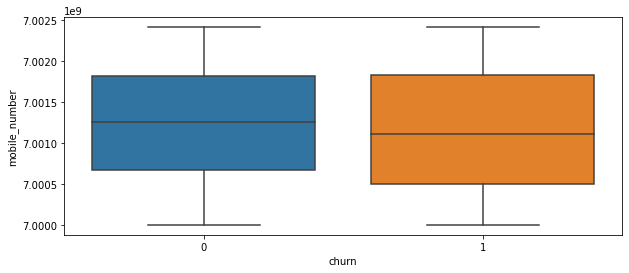

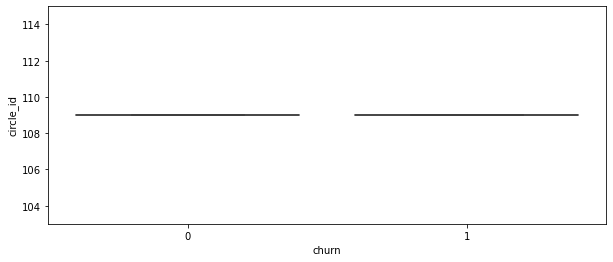

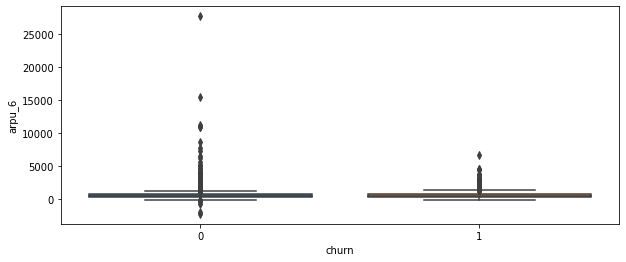

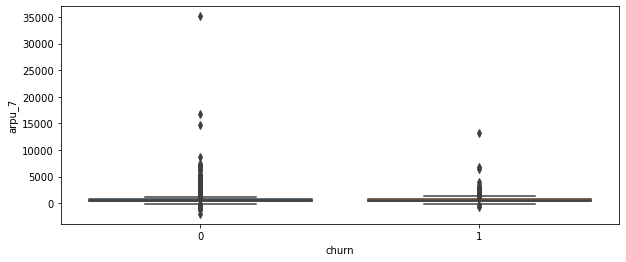

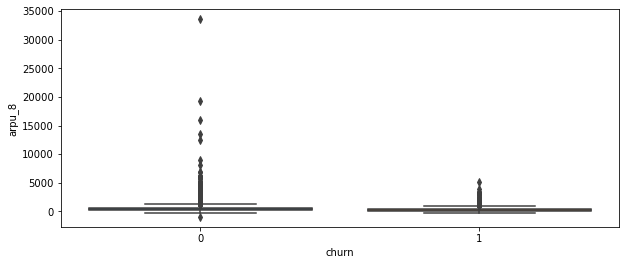

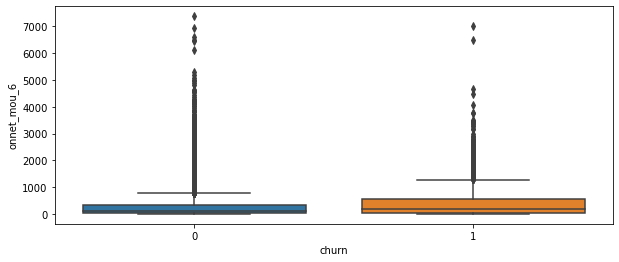

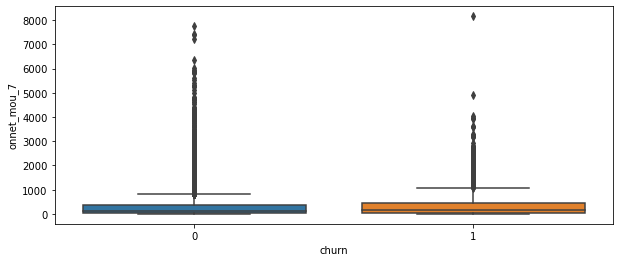

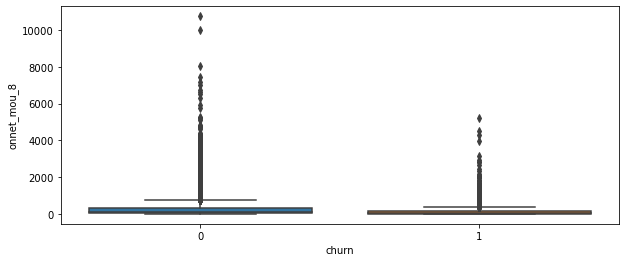

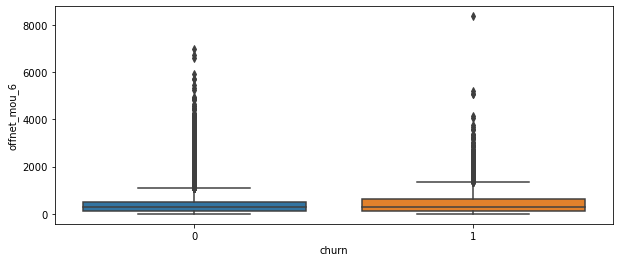

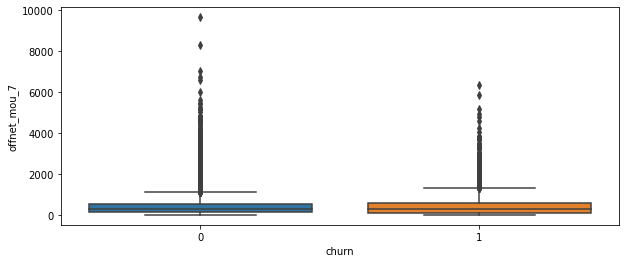

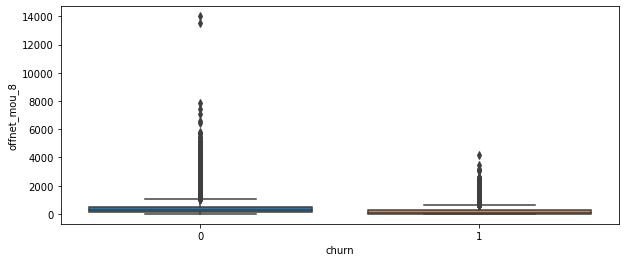

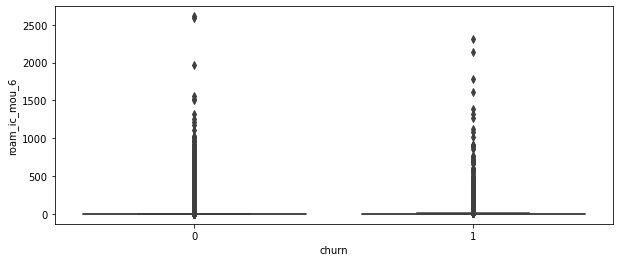

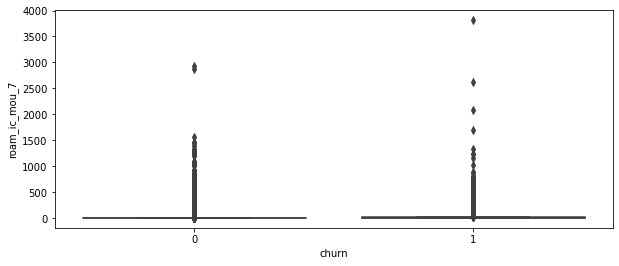

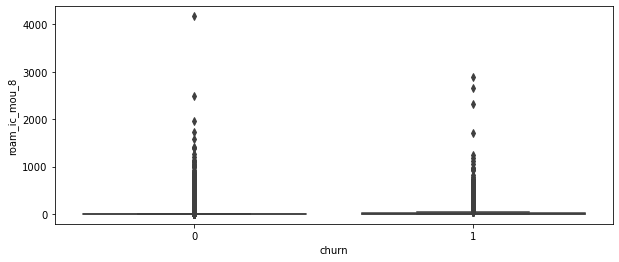

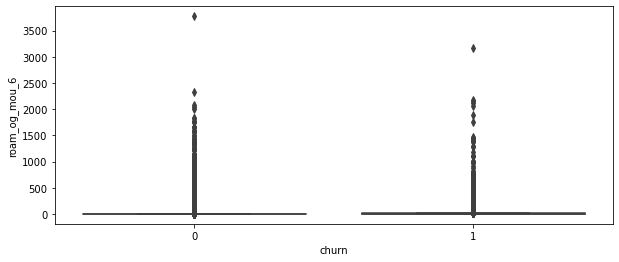

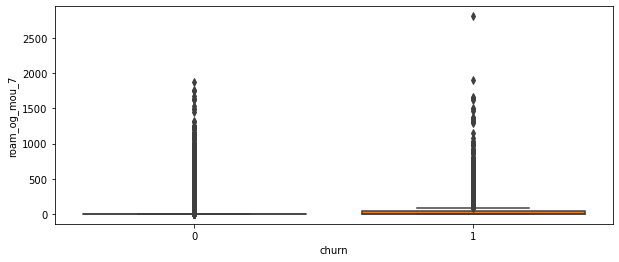

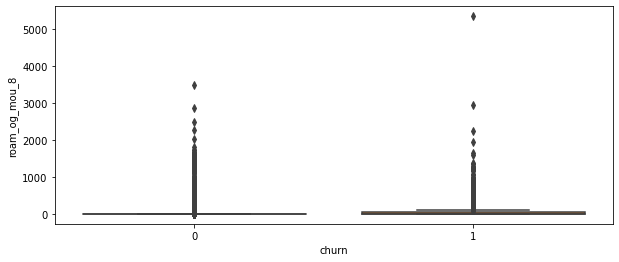

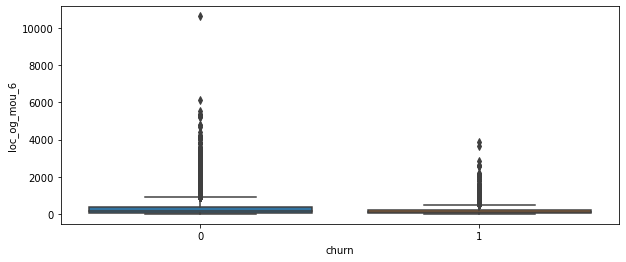

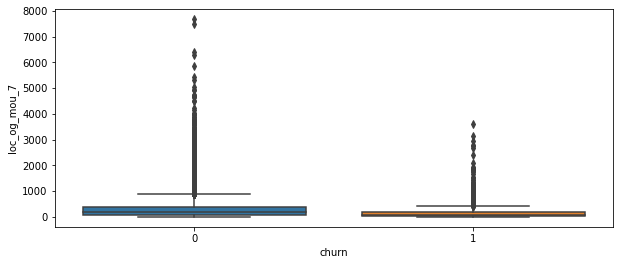

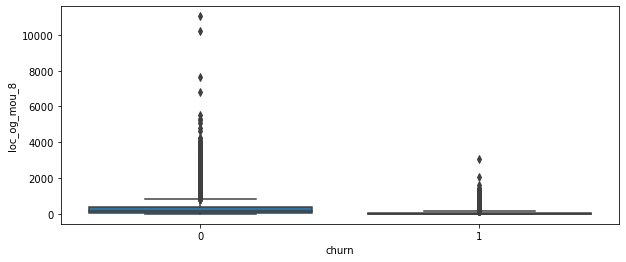

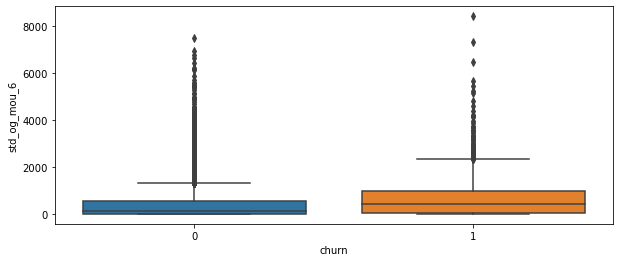

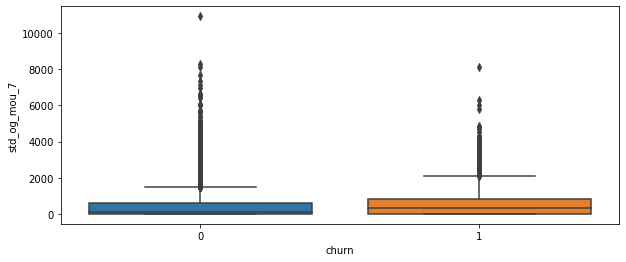

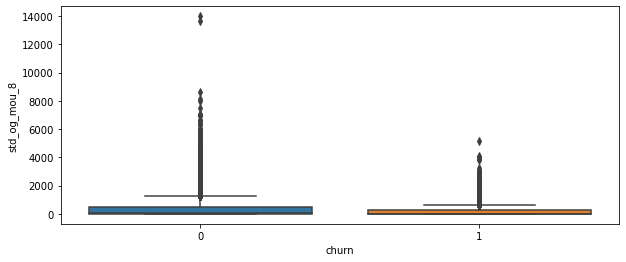

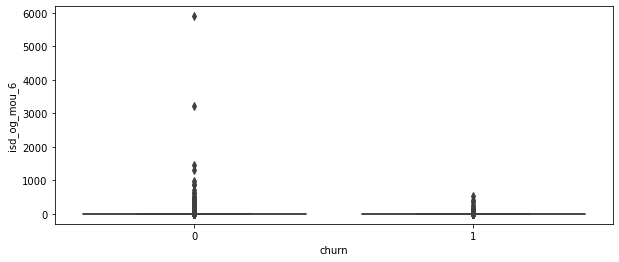

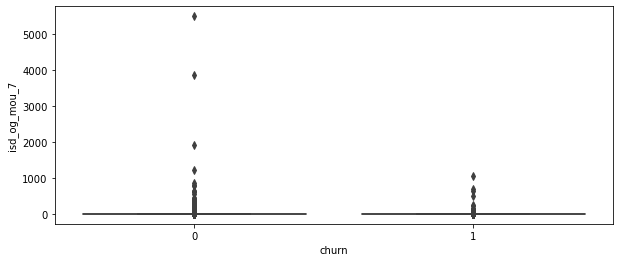

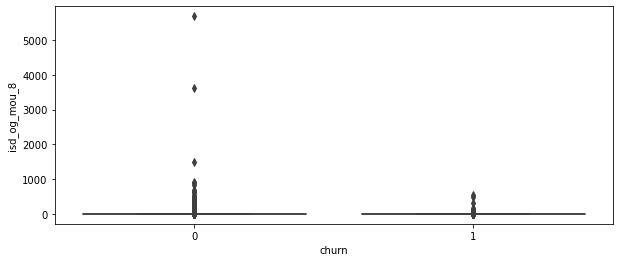

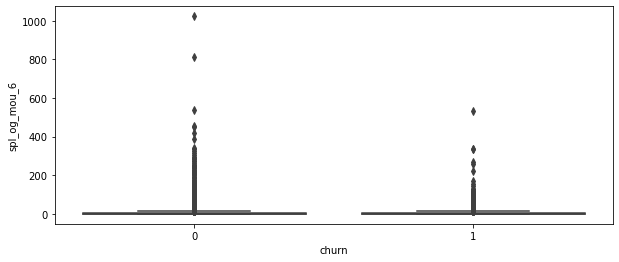

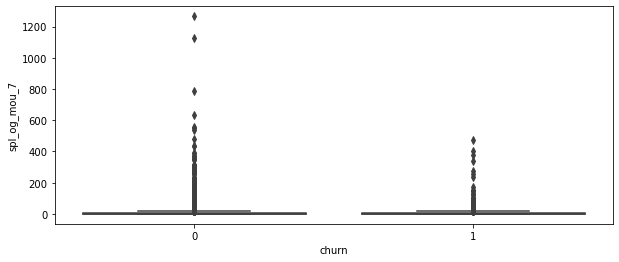

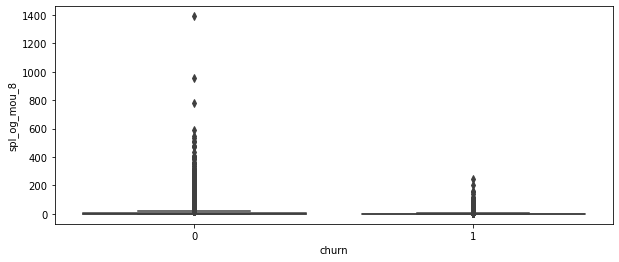

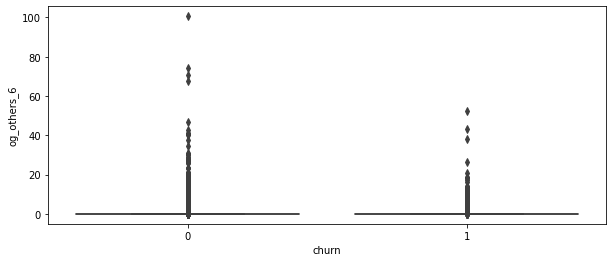

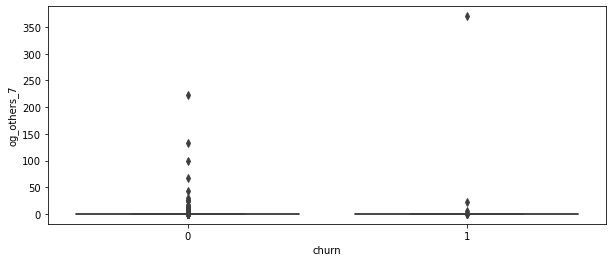

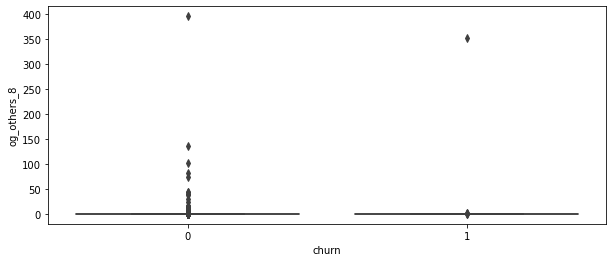

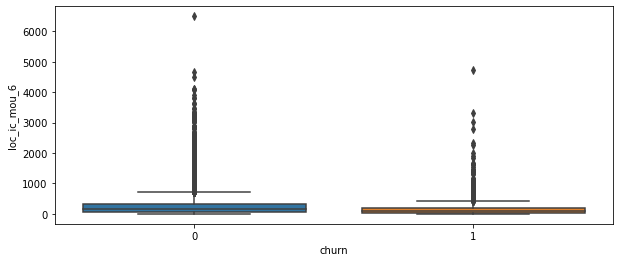

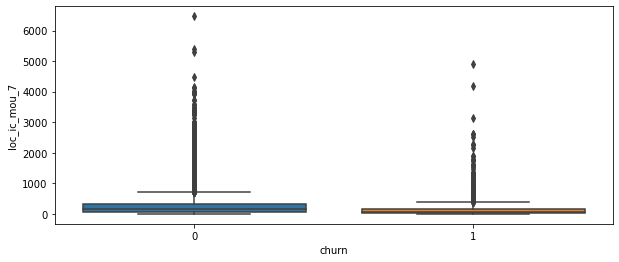

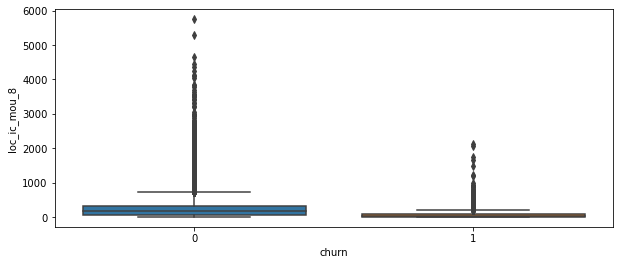

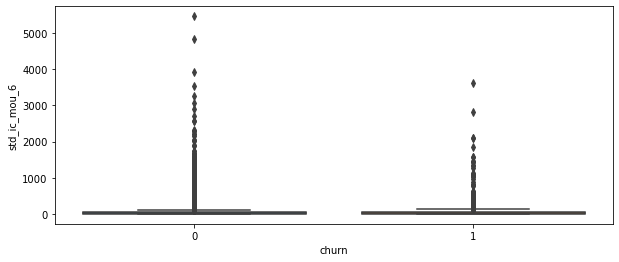

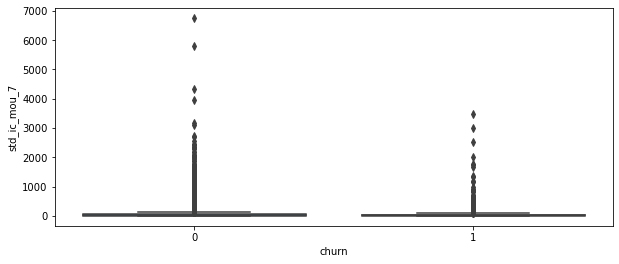

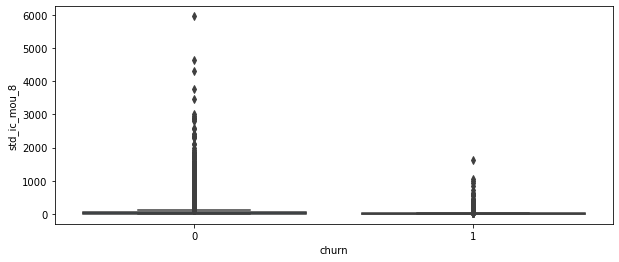

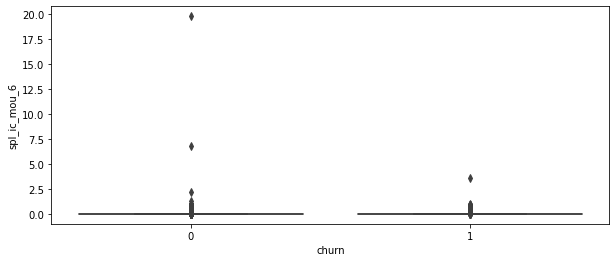

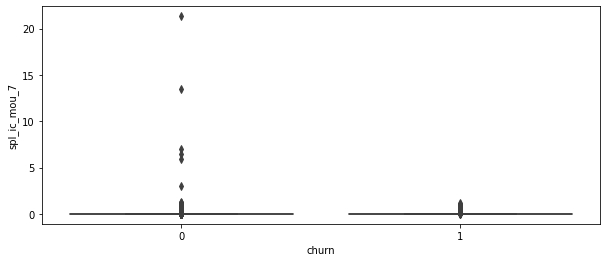

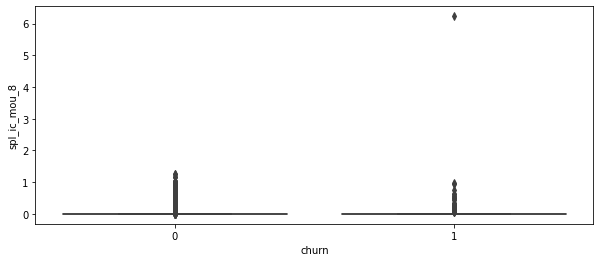

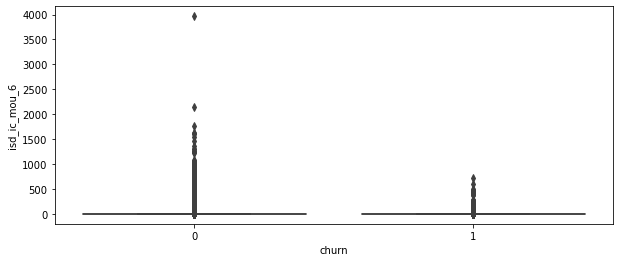

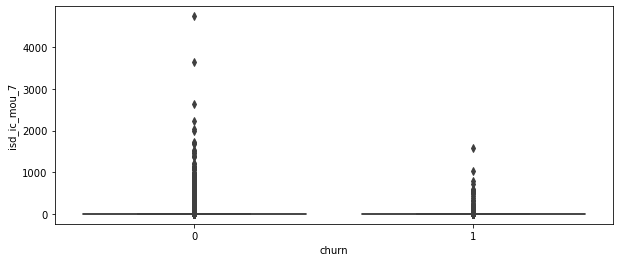

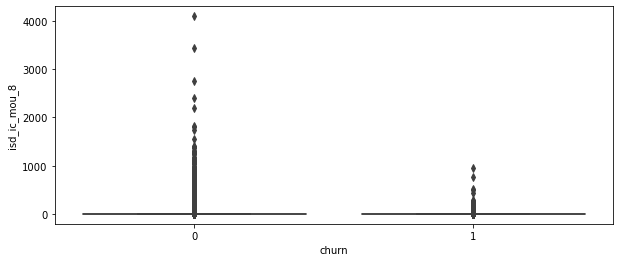

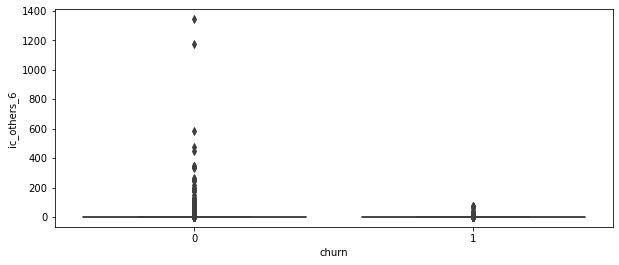

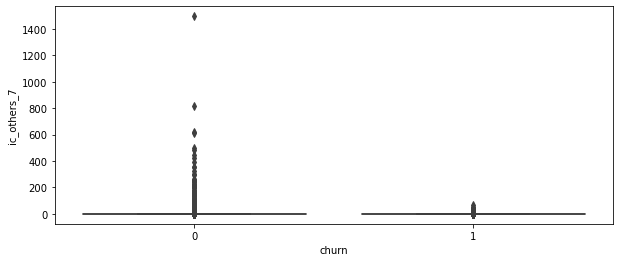

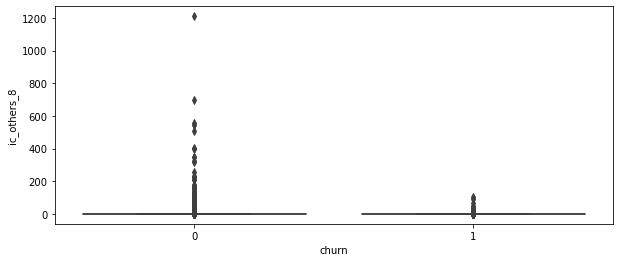

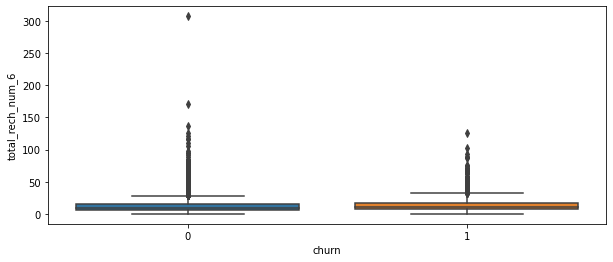

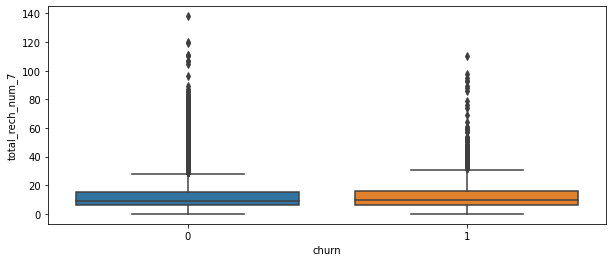

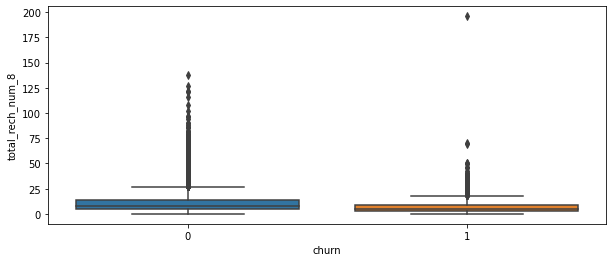

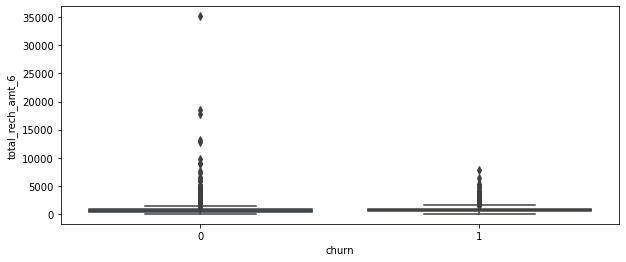

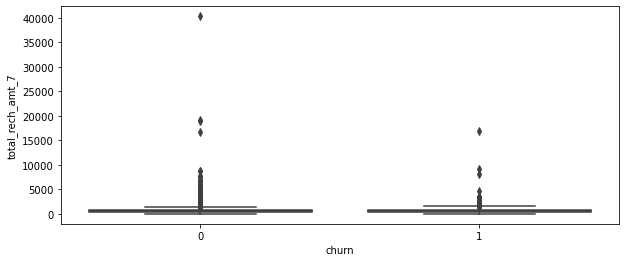

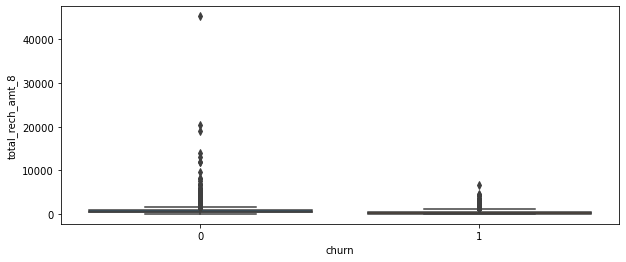

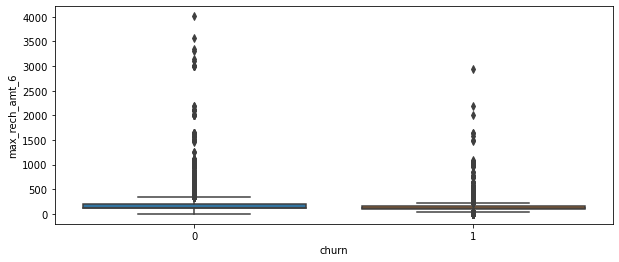

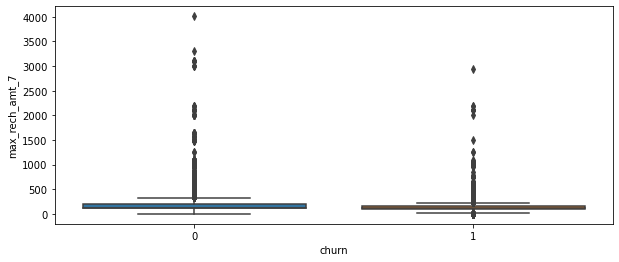

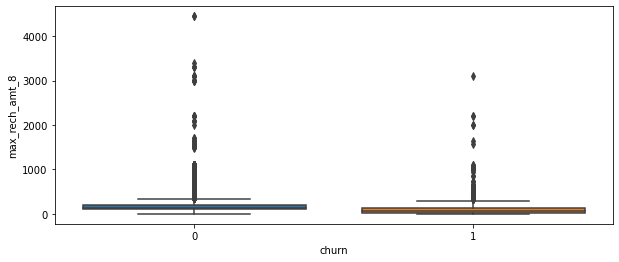

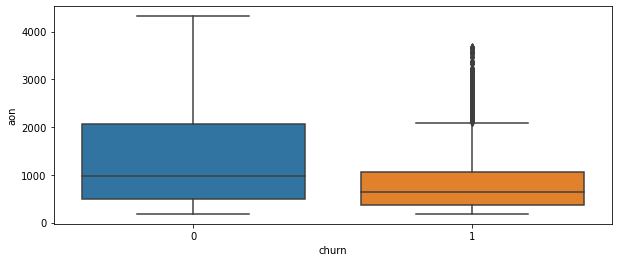

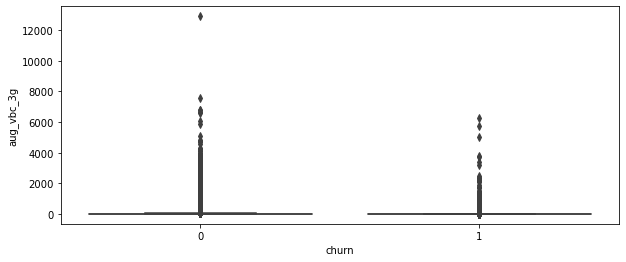

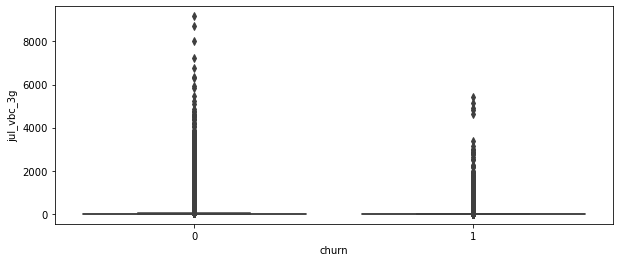

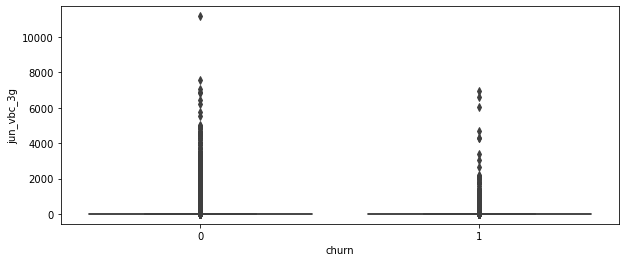

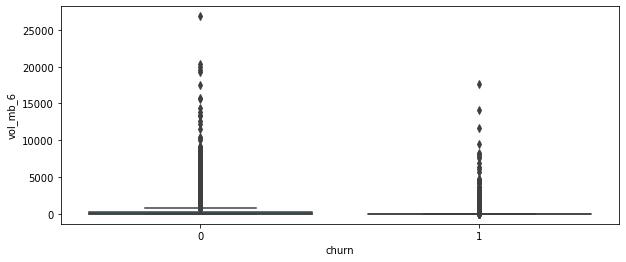

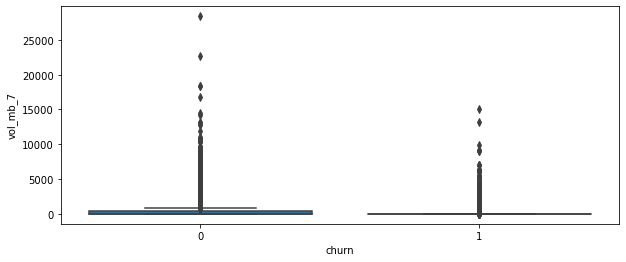

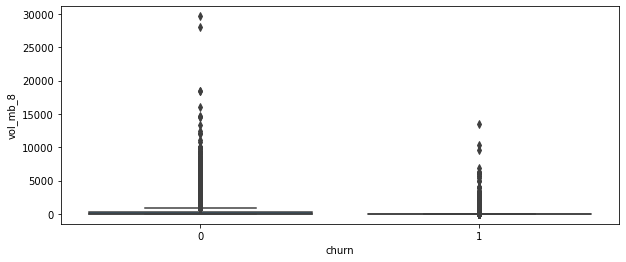

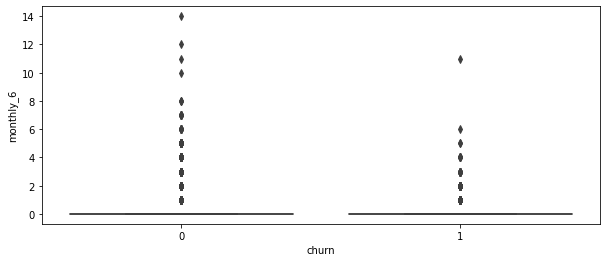

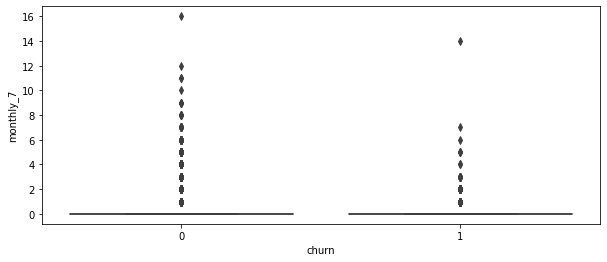

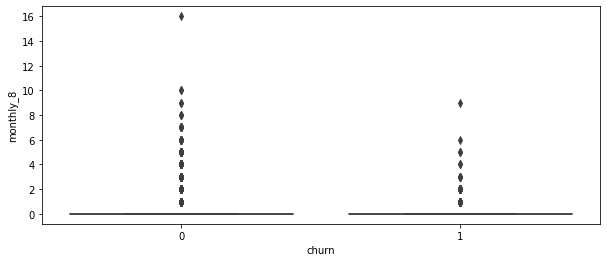

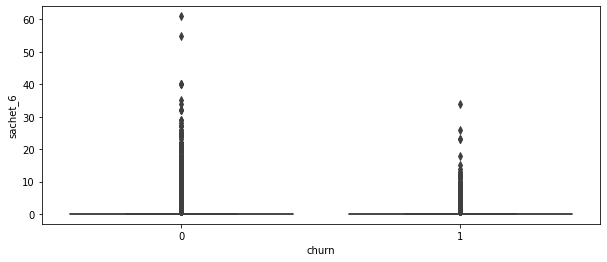

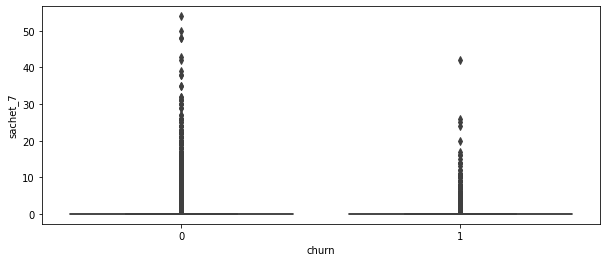

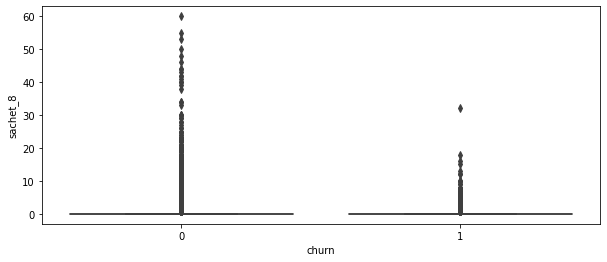

In [38]:
columns_plot = ['mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 
                'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 
                'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 
                'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 
                'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 
                'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 
                'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 
                'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 
                'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
                'jun_vbc_3g', 'vol_mb_6', 'vol_mb_7', 'vol_mb_8', 'monthly_6', 'monthly_7', 'monthly_8', 'sachet_6', 
                'sachet_7', 'sachet_8']

for col in columns_plot:
    plt.figure(figsize=(10,4))
    sns.boxplot(x='churn',y=col,data=telecom_high_2)
    plt.show()

- As we can see from the box plots there are lot of outliers. We cannot remove outliers because those are the very much high value customers that are contributing towards revenue. 

- `Aon` - We can infer from this boxplot is that users who have joined the industry recently are more likely to churn. So, industry needs to retain loyal customers and also plan some good schemes to retain the newly joined customers.

#### Plotting the heatmap for checking the multicolinearity

<AxesSubplot:>

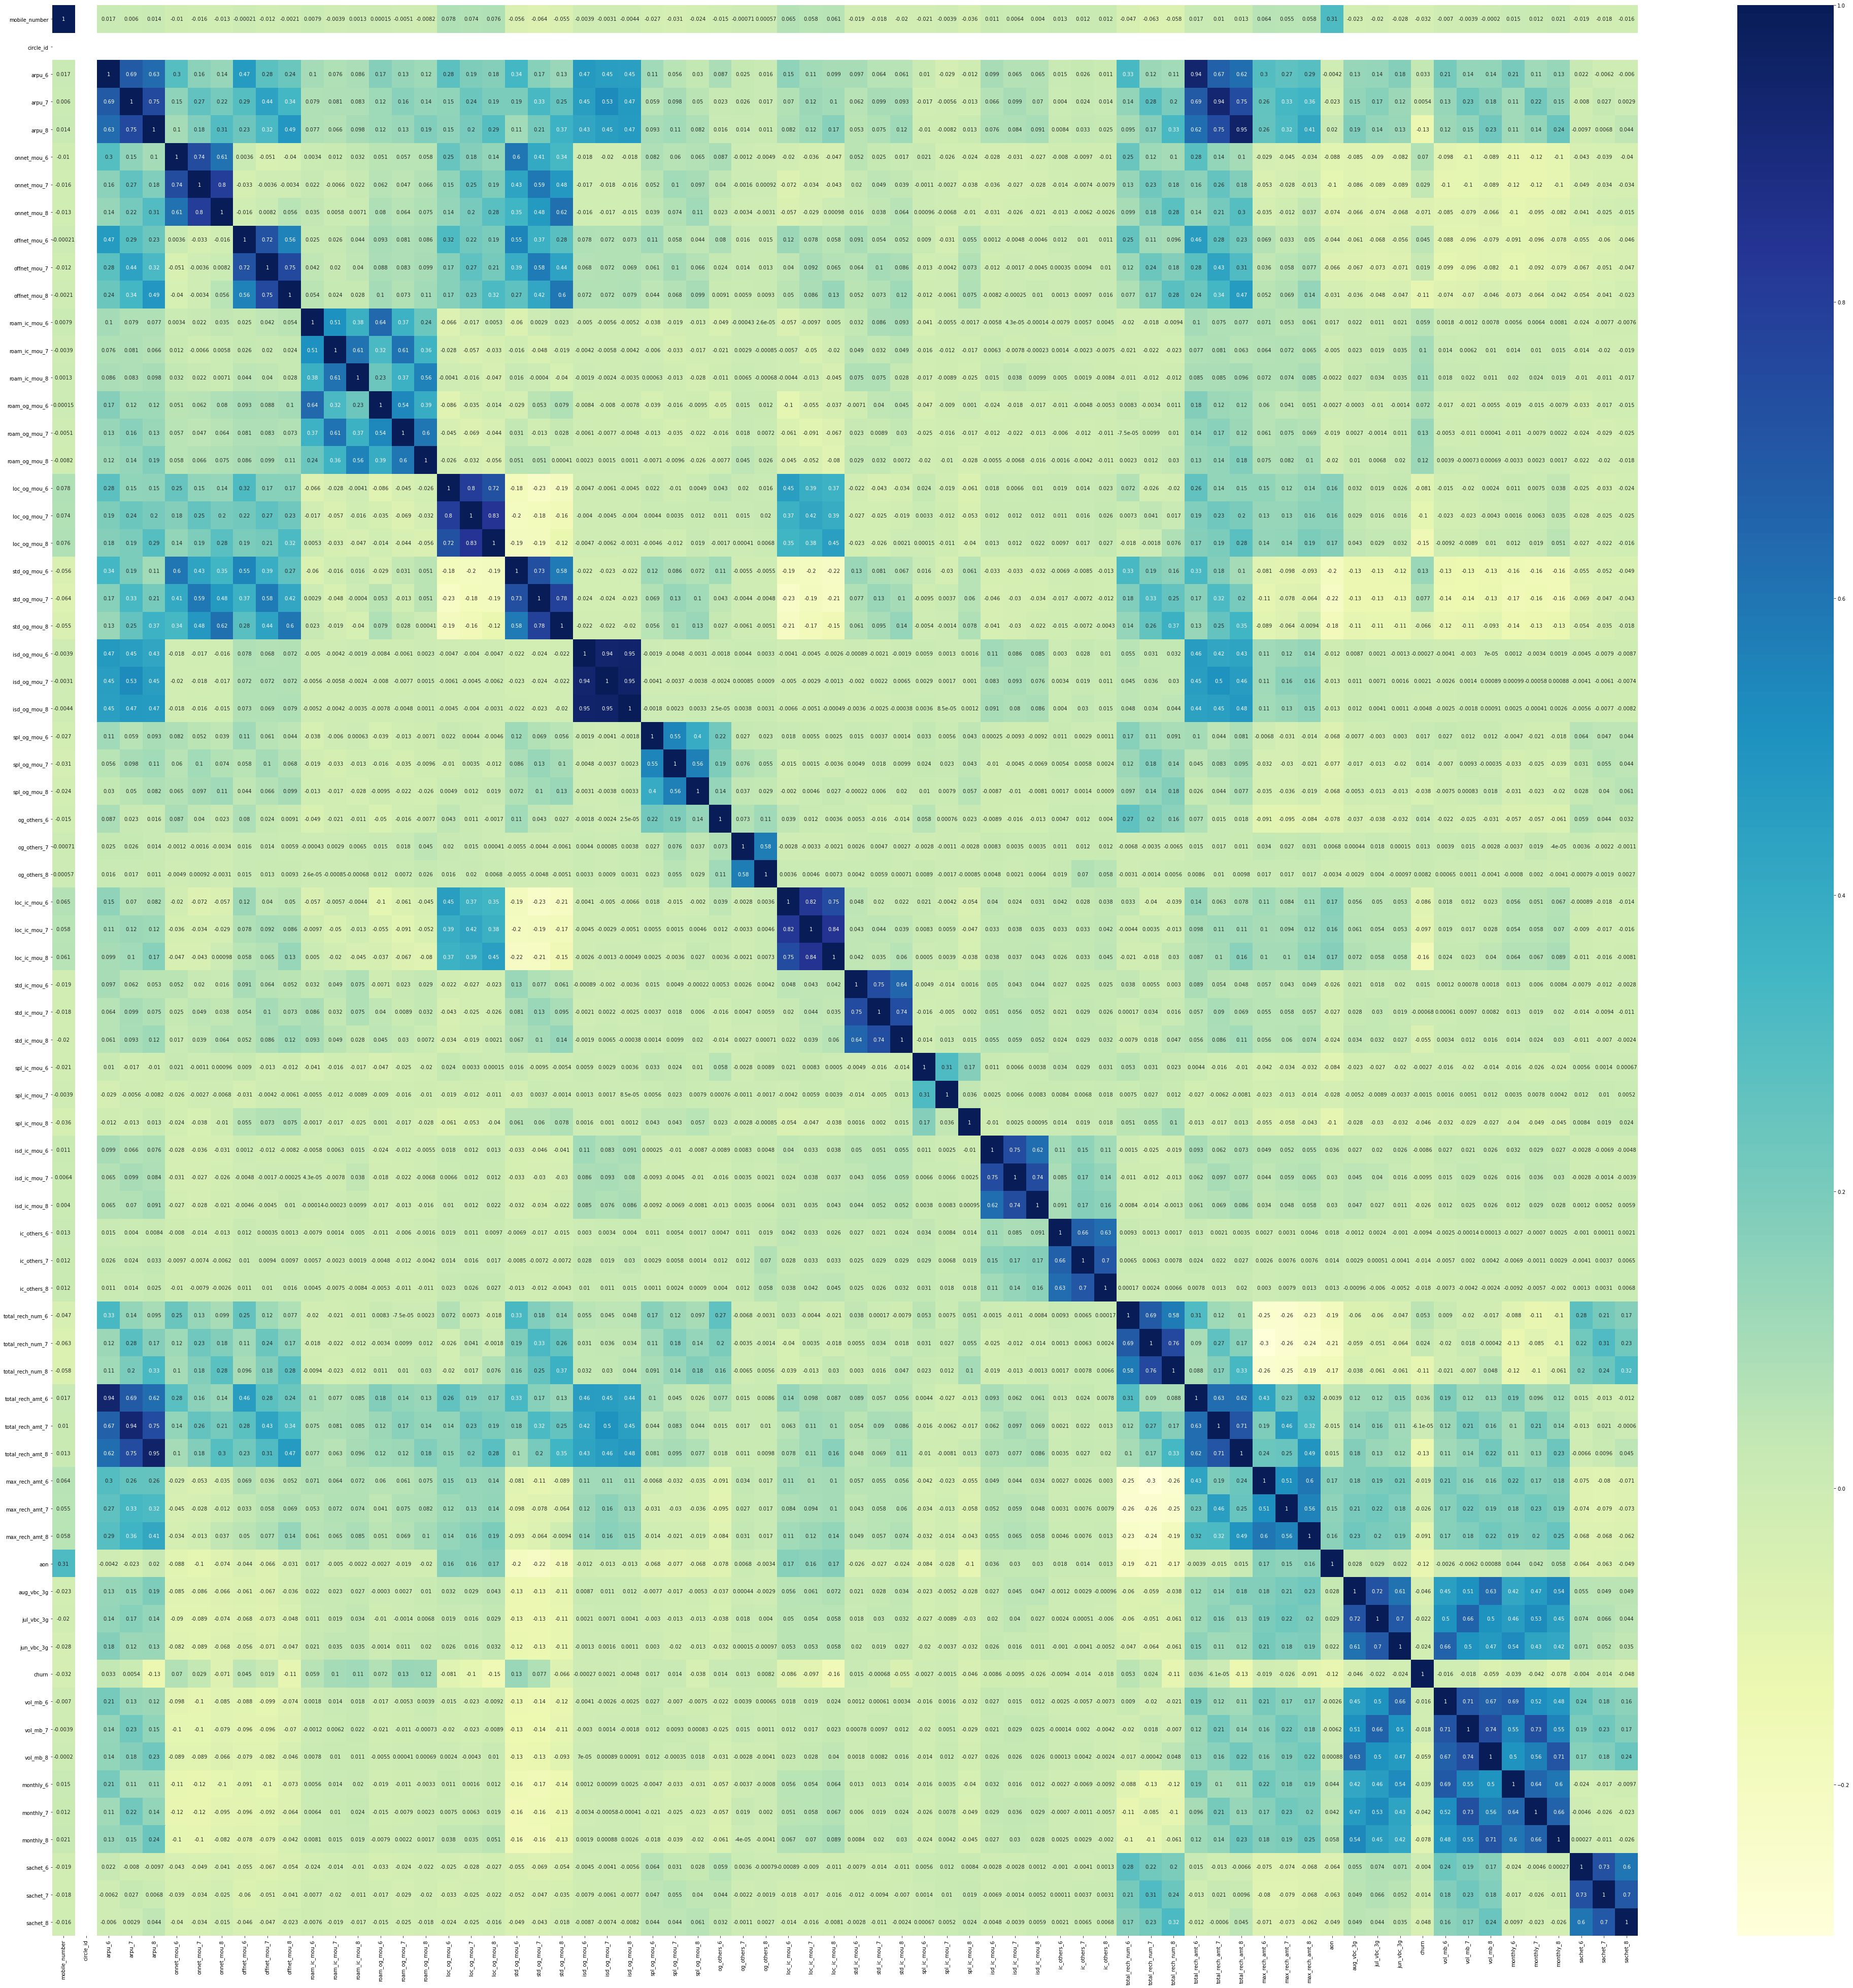

In [39]:
# Plotting a heatmap

plt.figure(figsize=(70,70))
sns.heatmap(telecom_high_2.corr(),cmap="YlGnBu", annot=True)

We can see in the above heatmap that some of the features are highly correlated. This multicolinearity will be taken care when we do PCA.

Let's move on to Model building and prediction.

## 3. Preparations for Model Building

Let's first start by splitting the data into train-test-split

In [40]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X. We don't need mobile number for training the data, hence removing it here
X = telecom_high_2.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_high_2['churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [41]:
X.shape

(28861, 68)

In [42]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [43]:
X_train.shape

(20202, 68)

In [44]:
X_test.shape

(8659, 68)

Let's do scaling of data so as to acheive normalisation

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [46]:
X_train = scaler.fit_transform(X_train)

In [47]:
X_train.shape

(20202, 68)

In [48]:
X_train_scaled = pd.DataFrame(X_train,columns=X.columns)

In [49]:
X_train_scaled.head()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,vol_mb_6,vol_mb_7,vol_mb_8,monthly_6,monthly_7,monthly_8,sachet_6,sachet_7,sachet_8
0,0.0,0.092364,0.072987,0.046147,0.002950,0.003920,0.006260,0.051868,0.052657,0.032448,0.000000,0.000000,0.014902,0.000000,0.000000,0.007341,0.011299,0.027237,0.022506,0.039676,0.030355,0.016751,0.0,0.0,0.0,0.000801,0.000000,0.000000,0.0,0.0,0.0,0.040413,0.072315,0.064328,0.013486,0.012583,0.009038,0.0167,0.0,0.0,0.050576,0.019642,0.025221,0.000751,0.015896,0.000331,0.129412,0.241667,0.071429,0.016681,0.020677,0.015887,0.022444,0.012469,0.044954,0.154144,0.000000,0.000000,0.000000,0.000171,0.002528,0.0,0.0,0.0,0.0,0.016393,0.037037,0.0
1,0.0,0.090678,0.072696,0.043659,0.004059,0.002861,0.003402,0.086954,0.176752,0.092344,0.004856,0.000000,0.000000,0.010262,0.000000,0.000000,0.005218,0.002077,0.003332,0.078595,0.156531,0.092510,0.0,0.0,0.0,0.000000,0.003670,0.000000,0.0,0.0,0.0,0.014353,0.015105,0.023754,0.022897,0.115508,0.121718,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094118,0.166667,0.066327,0.015175,0.019140,0.015909,0.027431,0.031920,0.029220,0.149311,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.091549,0.064573,0.027693,0.107193,0.065647,0.001613,0.003466,0.001573,0.000356,0.000000,0.000532,0.000165,0.000000,0.001401,0.004184,0.008328,0.003422,0.000000,0.086690,0.047433,0.000000,0.0,0.0,0.0,0.000000,0.001564,0.000000,0.0,0.0,0.0,0.011385,0.009558,0.000000,0.007250,0.005727,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000342,0.000000,0.000000,0.105882,0.150000,0.005102,0.016368,0.011033,0.000000,0.012469,0.012469,0.000000,0.136990,0.000000,0.000000,0.000000,0.000000,0.003884,0.0,0.0,0.0,0.0,0.000000,0.018519,0.0
3,0.0,0.112725,0.081211,0.054678,0.220015,0.241080,0.158951,0.124180,0.085163,0.046069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002399,0.007587,0.000979,0.311368,0.247093,0.167305,0.0,0.0,0.0,0.012490,0.027717,0.010885,0.0,0.0,0.0,0.008622,0.005023,0.001451,0.012939,0.002487,0.005947,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.133333,0.051020,0.040239,0.036172,0.023963,0.029925,0.031920,0.033715,0.035757,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.093332,0.063371,0.038512,0.006836,0.007280,0.005209,0.037577,0.019507,0.014113,0.042659,0.000000,0.000000,0.022558,0.000000,0.000000,0.019282,0.027086,0.014917,0.008371,0.003666,0.004760,0.0,0.0,0.0,0.004508,0.000000,0.023551,0.0,0.0,0.0,0.043617,0.054485,0.053477,0.009187,0.003636,0.004593,0.0000,0.0,0.0,0.005956,0.001028,0.001334,0.000000,0.000000,0.000000,0.023529,0.033333,0.005102,0.023217,0.019586,0.000000,0.187032,0.197007,0.000000,0.088669,0.007625,0.014287,0.010018,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


#### Plotting bar plot to see the imbalance in the data set

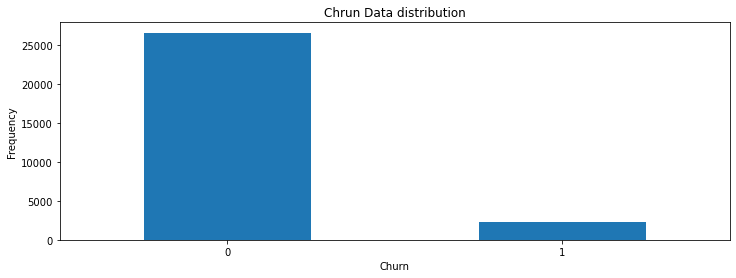

In [50]:
plt.figure(figsize = (12,4))

pd.value_counts(telecom_high_2['churn'],sort=True).plot(kind='bar',rot=0)
plt.title('Chrun Data distribution')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.show()

As we can see above there is a huge class imbalance too. We will take care of it using cross validation scheme.

First, let's move ahead and do PCA.

### PCA (Principal Componet Analysis)

In [51]:
# importing the necessary library

from sklearn.decomposition import PCA

In [52]:
# initialising PCA

pca = PCA(random_state=42)

In [53]:
pca.fit(X_train)

PCA(random_state=42)

In [54]:
# Checking PCA components

pca.components_

array([[-2.37892821e-19, -9.65693853e-04, -2.21974375e-03, ...,
        -1.03066313e-02, -1.40382164e-02, -1.00371464e-02],
       [ 2.36406482e-19,  1.86357015e-02,  1.81412945e-02, ...,
        -8.12476347e-03, -1.43227093e-03,  7.04461408e-04],
       [-2.08871331e-19,  6.87010227e-02,  6.15044447e-02, ...,
         3.35125570e-02,  4.87457641e-02,  4.01459899e-02],
       ...,
       [-1.64113201e-16, -5.48322028e-03,  2.66761251e-03, ...,
         1.02335733e-04, -3.02752614e-04,  1.25044826e-04],
       [ 1.07623705e-16,  1.24526807e-03,  1.27765795e-03, ...,
        -1.66499197e-05, -1.28553901e-04,  6.69379207e-05],
       [ 1.00000000e+00,  5.08673547e-18,  2.35942133e-18, ...,
         4.97487025e-19, -1.37077980e-18,  2.18873789e-18]])

In [55]:
# Now let's look at the explained variance ratio for each component

pca.explained_variance_ratio_

array([3.85978535e-01, 1.12580645e-01, 7.62227981e-02, 6.04918783e-02,
       5.60599716e-02, 4.45577526e-02, 2.40706255e-02, 2.16123411e-02,
       2.02772495e-02, 1.83089986e-02, 1.59951855e-02, 1.51702813e-02,
       1.36922213e-02, 9.96699997e-03, 9.58050041e-03, 8.67016649e-03,
       7.07435459e-03, 6.22521730e-03, 6.02429934e-03, 5.98170280e-03,
       5.80448997e-03, 5.48669215e-03, 5.12974461e-03, 4.46790499e-03,
       4.21675190e-03, 3.94802789e-03, 3.86957056e-03, 3.70034924e-03,
       3.48597718e-03, 3.07509587e-03, 3.04919038e-03, 2.80252322e-03,
       2.58386643e-03, 2.51640902e-03, 2.40103110e-03, 2.18318892e-03,
       2.10178744e-03, 2.08904114e-03, 1.89921761e-03, 1.78766612e-03,
       1.47711233e-03, 1.41923232e-03, 1.39215750e-03, 1.31310754e-03,
       1.12982054e-03, 1.03853324e-03, 1.01416407e-03, 8.33938066e-04,
       8.23831186e-04, 7.13376004e-04, 6.42647450e-04, 6.33533941e-04,
       5.00133079e-04, 3.86318324e-04, 3.80390945e-04, 2.94137376e-04,
      

Let's make a scree plot so that we can figure out the appropriate columns that we can take.

In [56]:
# First let's take a cumulative sum of all explained variance ratio

var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.38597854, 0.49855918, 0.57478198, 0.63527386, 0.69133383,
       0.73589158, 0.75996221, 0.78157455, 0.8018518 , 0.8201608 ,
       0.83615598, 0.85132626, 0.86501848, 0.87498548, 0.88456598,
       0.89323615, 0.90031051, 0.90653572, 0.91256002, 0.91854172,
       0.92434621, 0.92983291, 0.93496265, 0.93943056, 0.94364731,
       0.94759534, 0.95146491, 0.95516526, 0.95865123, 0.96172633,
       0.96477552, 0.96757804, 0.97016191, 0.97267832, 0.97507935,
       0.97726254, 0.97936433, 0.98145337, 0.98335258, 0.98514025,
       0.98661736, 0.9880366 , 0.98942875, 0.99074186, 0.99187168,
       0.99291021, 0.99392438, 0.99475832, 0.99558215, 0.99629552,
       0.99693817, 0.9975717 , 0.99807184, 0.99845816, 0.99883855,
       0.99913268, 0.99938312, 0.99962023, 0.99980875, 0.99987498,
       0.99992508, 0.9999599 , 0.99997766, 0.99999511, 0.99999869,
       0.9999994 , 1.        , 1.        ])

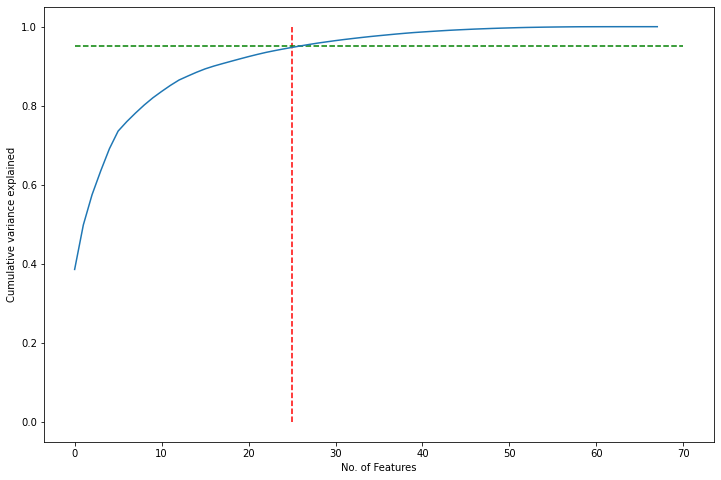

In [57]:
# Let's make a scree plot now

fig = plt.figure(figsize=[12,8])
plt.vlines(x=25, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=70, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.xlabel("No. of Features")
plt.show()

As we can see from the above scree plot is that top features are 25. After 25 we are getting a stagnant graph.

Let's move ahead and do PCA with 25 features.

In [58]:
# PCA with 16 components

from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=25)

In [59]:
# Now doing a fit transform on the train data set

X_train_pca = pca_final.fit_transform(X_train)

In [60]:
X_train_pca.shape

(20202, 25)

Let's plot the heatmap to see the relation between the top 25 features

In [61]:
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(25, 25)

<AxesSubplot:>

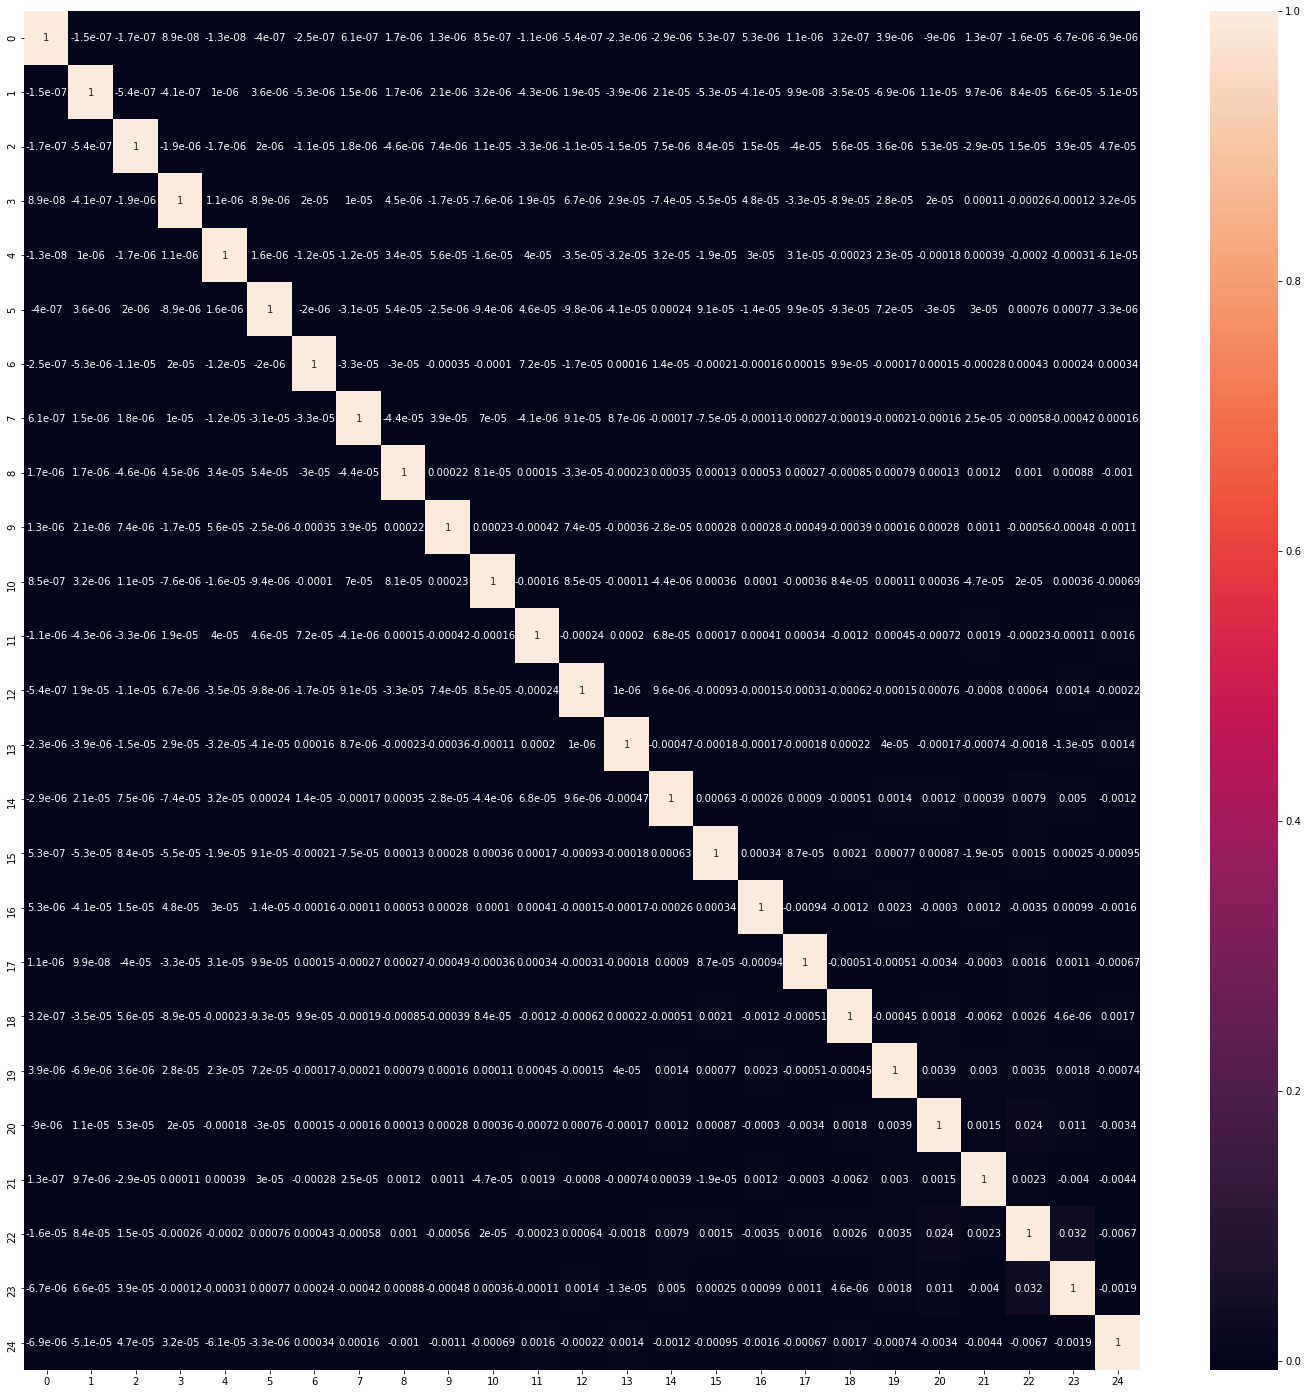

In [62]:
# Plotting the heatmap

plt.figure(figsize=[25,25])
sns.heatmap(corrmat, annot=True)

We can see that PCA has perfectly handled multicolinearity.

In [63]:
# First scale the test set

X_test = scaler.transform(X_test)

In [64]:
# Applying transformation on the test set

X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8659, 25)

## 4. Model Building

Let's start with Logistic regression model

In [65]:
# importing the necessary library

from sklearn.linear_model import LogisticRegression

# initialising the Logistic Regression class

learner_pca = LogisticRegression()

In [66]:
# Fitting the model

model_pca = learner_pca.fit(X_train_pca, y_train)

First make predictions on the train set and then we move on to test set for comparison

In [67]:
y_pred_train = model_pca.predict_proba(X_train_pca)

In [68]:
y_pred_train

array([[0.93552561, 0.06447439],
       [0.93351573, 0.06648427],
       [0.6788537 , 0.3211463 ],
       ...,
       [0.95439754, 0.04560246],
       [0.94222185, 0.05777815],
       [0.96078357, 0.03921643]])

In [69]:
# importing metrics library to find roc_auc_score

from sklearn import metrics

"{:2.2}".format(metrics.roc_auc_score(y_train, y_pred_train[:,1]))

'0.85'

Now let's check the roc_auc_score on the test set

In [70]:
y_pred_test = model_pca.predict_proba(X_test_pca)

In [71]:
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_test[:,1]))

'0.84'

We can see that our model is performing pretty good on the test data set too.

Let's look into Roc_Auc curve now after making the confusion matrix

In [72]:
y_train_pred_final = y_train.copy()

y_train_pred_final = pd.DataFrame(y_train_pred_final)

In [73]:
y_train_pred_final.columns = ['churn']

In [74]:
y_train_pred_final['churn_prob'] = y_pred_train[:,1]

In [75]:
y_train_pred_final.head()

,churn,churn_prob
10429,0,0.064474
53828,0,0.066484
89898,0,0.321146
36974,0,0.117024
45900,0,0.129824


In [76]:
# Let's create a new column 'predicted' with 1 if churn_prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.churn_prob.map(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,predicted
10429,0,0.064474,0
53828,0,0.066484,0
89898,0,0.321146,0
36974,0,0.117024,0
45900,0,0.129824,0


In [77]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted))

0.9226314226314226


We can see that it is a pretty good accuracy score. But we need to look at other parameters as well like sensitivity, specificity, false negative rate and so on.

In [78]:
# Let's take a look at the confusion matrix again 

confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted )
confusion

array([[18556,    65],
       [ 1498,    83]], dtype=int64)

In [79]:
# Actual/Predicted     not_churn    churn
        # not_churn        18556      65
        # churn            1498       83  

Let's check metrics apart from simple accuracy

In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.05249841872232764

In [82]:
# Let us calculate specificity

TN / float(TN+FP)

0.996509317437302

In [83]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.003490682562698029


### Plot the ROC_AUC curve

In [84]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

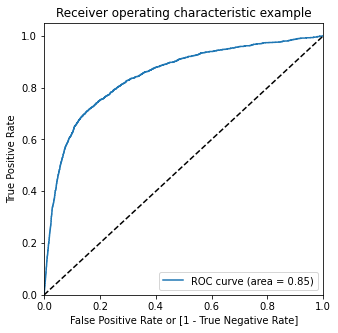

In [85]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

As we can see from the above auc_roc curve that overall model is performing pretty good.

#### Now finding the optimal cut off point

In [86]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
10429,0,0.064474,0,1,0,0,0,0,0,0,0,0,0
53828,0,0.066484,0,1,0,0,0,0,0,0,0,0,0
89898,0,0.321146,0,1,1,1,1,0,0,0,0,0,0
36974,0,0.117024,0,1,1,0,0,0,0,0,0,0,0
45900,0,0.129824,0,1,1,0,0,0,0,0,0,0,0


In [87]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.078260  1.000000  0.000000
0.1   0.1  0.805019  0.741935  0.810375
0.2   0.2  0.913523  0.442125  0.953547
0.3   0.3  0.922136  0.209994  0.982600
0.4   0.4  0.922829  0.095509  0.993072
0.5   0.5  0.922631  0.052498  0.996509
0.6   0.6  0.922285  0.028463  0.998174
0.7   0.7  0.922285  0.017078  0.999141
0.8   0.8  0.922235  0.010120  0.999678
0.9   0.9  0.921889  0.002530  0.999946


We can see from the above table that the optimal cut off will be 0.1 as model's accuracy, sensitivity and specifity are good at that point.

In order to visualise the same we will plot the graph between accuracy, sensitvity and specificity.

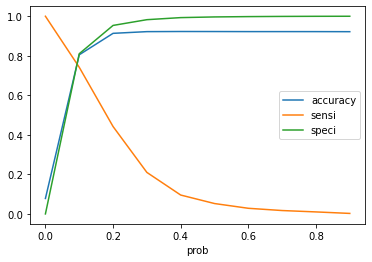

In [88]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

By Visualising also we are getting the optimal cut off point as 0.1

In [89]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
10429,0,0.064474,0,1,0,0,0,0,0,0,0,0,0,0
53828,0,0.066484,0,1,0,0,0,0,0,0,0,0,0,0
89898,0,0.321146,0,1,1,1,1,0,0,0,0,0,0,1
36974,0,0.117024,0,1,1,0,0,0,0,0,0,0,0,1
45900,0,0.129824,0,1,1,0,0,0,0,0,0,0,0,1


In [90]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.805019305019305

In [91]:
# Let's take a look at the confusion matrix again 

confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion

array([[15090,  3531],
       [  408,  1173]], dtype=int64)

In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7419354838709677

In [94]:
# Let us calculate specificity

TN / float(TN+FP)

0.8103753826325116

In [95]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.1896246173674883


We can see that by finding the optimal cut off value, we have improved on the above metrics.

As we can see from the above model, it is performing good but there is still scope for improvement.

So, Let's go ahead and build the XGBoost Model so that we can handle the class imbalance as XGboost performs cross validation.

#### XGBoost model

In [96]:
# import the required library

import xgboost as xgb

xg_telecom = xgb.XGBClassifier()

xg_telecom.fit(X_train_pca, y_train)

[19:17:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
y_train_xg_pred = xg_telecom.predict_proba(X_train_pca)[:, 1]

In [98]:
# Checking the roc_auc_score

metrics.roc_auc_score(y_true=y_train, y_score=y_train_xg_pred)

0.9998002024538141

We can see that roc_auc_score has significantly improved. Earlier it was 0.85 and now it is 0.99. Let us check other metrics as well.

In [99]:
y_train_pred_xg = y_train.copy()

y_train_pred_xg = pd.DataFrame(y_train_pred_xg)

y_train_pred_xg.columns = ['churn']

y_train_pred_xg['churn_prob'] = y_train_xg_pred

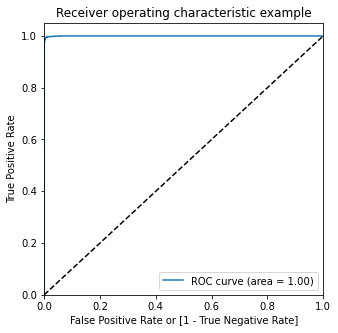

In [100]:
draw_roc(y_train_pred_xg.churn, y_train_pred_xg.churn_prob)

This is the case of overfitting and we will deal with it by creating a different model after tuning the hyperparameters.

In [101]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_xg[i]= y_train_pred_xg.churn_prob.map(lambda x: 1 if x > i else 0)


# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_xg.churn, y_train_pred_xg[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.078260  1.000000  0.000000
0.1   0.1  0.960895  0.999367  0.957628
0.2   0.2  0.989704  0.996205  0.989152
0.3   0.3  0.996832  0.987982  0.997583
0.4   0.4  0.997178  0.969639  0.999517
0.5   0.5  0.995248  0.940544  0.999893
0.6   0.6  0.990298  0.876660  0.999946
0.7   0.7  0.980200  0.746996  1.000000
0.8   0.8  0.961043  0.502214  1.000000
0.9   0.9  0.936046  0.182796  1.000000


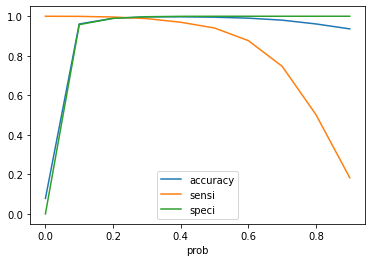

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

We can see that the optimal cut off point is 0.2 because sensitivity is highest at that point. We need sensitivity as high as possible based on our business requirement.

In [103]:
y_train_pred_xg['final_predicted'] = y_train_pred_xg.churn_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_xg.head()


# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_xg.churn, y_train_pred_xg.final_predicted)


# Let's take a look at the confusion matrix again 

confusion = metrics.confusion_matrix(y_train_pred_xg.churn, y_train_pred_xg.final_predicted )


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Let's see the sensitivity of our logistic regression model

sen = TP / float(TP+FN)
print("Sensitivity = ", sen)

# Let us calculate specificity

spe = TN / float(TN+FP)
print("Specificity = ", spe)

# Calculate false postive rate - predicting churn when customer does not have churned

fp = FP/ float(TN+FP)
print("False Positive rate = ", fp)

Sensitivity =  0.9962049335863378
Specificity =  0.9891520326513077
False Positive rate =  0.010847967348692337


In [104]:
confusion

array([[18419,   202],
       [    6,  1575]], dtype=int64)

Since this model is giving a very good metrics score, we can move ahead and test it for the test set.

In [105]:
y_test_xg_pred = xg_telecom.predict_proba(X_test_pca)[:, 1]

In [106]:
# Checking the roc_auc_score

metrics.roc_auc_score(y_true=y_test, y_score=y_test_xg_pred)

0.828001038008539

In [107]:
y_test_pred_xg = y_test.copy()

y_test_pred_xg = pd.DataFrame(y_test_pred_xg)

y_test_pred_xg.columns = ['churn']

y_test_pred_xg['churn_prob'] = y_test_xg_pred

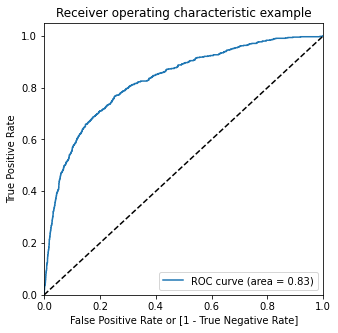

In [108]:
draw_roc(y_test_pred_xg.churn, y_test_pred_xg.churn_prob)

In [109]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_xg[i]= y_test_pred_xg.churn_prob.map(lambda x: 1 if x > i else 0)


# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_xg.churn, y_test_pred_xg[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.076221  1.000000  0.000000
0.1   0.1  0.874350  0.557576  0.900488
0.2   0.2  0.905647  0.448485  0.943368
0.3   0.3  0.914655  0.356061  0.960745
0.4   0.4  0.919390  0.274242  0.972622
0.5   0.5  0.922393  0.200000  0.981998
0.6   0.6  0.923201  0.133333  0.988374
0.7   0.7  0.924125  0.086364  0.993249
0.8   0.8  0.923779  0.045455  0.996250
0.9   0.9  0.924587  0.016667  0.999500


We can see that sensitivity is not as good as train data set. We can build another model to improve on sensitivity.

#### Let's build another model

In [110]:
from sklearn import model_selection

xgb_model = xgb.XGBClassifier()

parameters = {'learning_rate': [0.2, 0.3, 0.4],
              'max_depth': [4, 6, 8],
              'min_child_weight': [1, 2],
              'n_estimators': [50, 100, 150]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

telecom_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

telecom_xgb.fit(X_train_pca, y_train)

[19:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [111]:
# Getting best parameters, score and estimator

print(telecom_xgb.best_params_)
print(telecom_xgb.best_score_)
print(telecom_xgb.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 50}
0.8551783519188869
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [112]:
y_train_xg_pred_1 = telecom_xgb.predict_proba(X_train_pca)[:, 1]

In [113]:
# Checking the roc_auc_score

metrics.roc_auc_score(y_true=y_train, y_score=y_train_xg_pred_1)

0.9247947701820403

In [114]:
y_train_pred_xg_1 = y_train.copy()

y_train_pred_xg_1 = pd.DataFrame(y_train_pred_xg_1)

y_train_pred_xg_1.columns = ['churn']

y_train_pred_xg_1['churn_prob'] = y_train_xg_pred_1

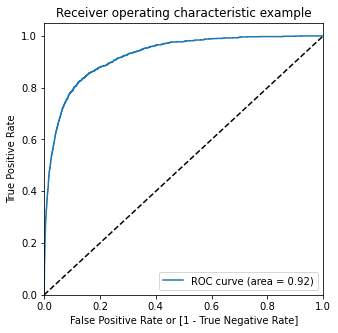

In [115]:
# Plotting Roc_Auc curve

draw_roc(y_train_pred_xg_1.churn, y_train_pred_xg_1.churn_prob)

In [116]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_xg_1[i]= y_train_pred_xg_1.churn_prob.map(lambda x: 1 if x > i else 0)


# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_xg_1.churn, y_train_pred_xg_1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.078260  1.000000  0.000000
0.1   0.1  0.866845  0.826692  0.870254
0.2   0.2  0.921988  0.693865  0.941357
0.3   0.3  0.936640  0.574320  0.967402
0.4   0.4  0.942184  0.455408  0.983513
0.5   0.5  0.940402  0.319418  0.993126
0.6   0.6  0.934016  0.184693  0.997637
0.7   0.7  0.926393  0.064516  0.999570
0.8   0.8  0.922631  0.011385  1.000000
0.9   0.9  0.921790  0.000633  1.000000


We can see the optimal cut off is 0.1

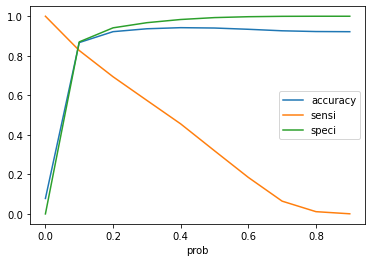

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [118]:
y_train_pred_xg_1['final_predicted'] = y_train_pred_xg_1.churn_prob.map( lambda x: 1 if x > 0.1 else 0)


# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_xg_1.churn, y_train_pred_xg_1.final_predicted)


# Let's take a look at the confusion matrix again 

confusion = metrics.confusion_matrix(y_train_pred_xg_1.churn, y_train_pred_xg_1.final_predicted )


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Let's see the sensitivity of our logistic regression model

sen = TP / float(TP+FN)
print("Sensitivity = ", sen)

# Let us calculate specificity

spe = TN / float(TN+FP)
print("Specificity = ", spe)

# Calculate false postive rate - predicting churn when customer does not have churned

fp = FP/ float(TN+FP)
print("False Positive rate = ", fp)

Sensitivity =  0.8266919671094244
Specificity =  0.8702540142849471
False Positive rate =  0.1297459857150529


In [119]:
confusion

array([[16205,  2416],
       [  274,  1307]], dtype=int64)

let's check it for test set now

In [120]:
y_test_xg_pred_1 = telecom_xgb.predict_proba(X_test_pca)[:, 1]

In [121]:
# Checking the roc_auc_score

metrics.roc_auc_score(y_true=y_test, y_score=y_test_xg_pred_1)

0.8412456860137819

In [122]:
y_test_pred_xg_1 = y_test.copy()

y_test_pred_xg_1 = pd.DataFrame(y_test_pred_xg_1)

y_test_pred_xg_1.columns = ['churn']

y_test_pred_xg_1['churn_prob'] = y_test_xg_pred_1

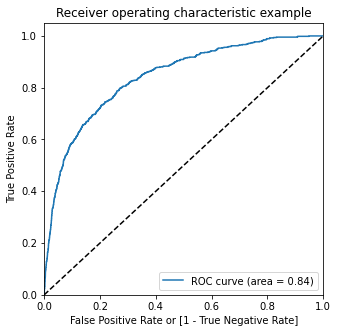

In [123]:
# Plotting Roc_Auc curve

draw_roc(y_test_pred_xg_1.churn, y_test_pred_xg_1.churn_prob)

In [124]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_xg_1[i]= y_test_pred_xg_1.churn_prob.map(lambda x: 1 if x > i else 0)


# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_xg_1.churn, y_test_pred_xg_1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.076221  1.000000  0.000000
0.1   0.1  0.840628  0.659091  0.855607
0.2   0.2  0.898718  0.521212  0.929866
0.3   0.3  0.914886  0.404545  0.956995
0.4   0.4  0.921815  0.295455  0.973497
0.5   0.5  0.923779  0.180303  0.985123
0.6   0.6  0.925857  0.095455  0.994374
0.7   0.7  0.924356  0.033333  0.997875
0.8   0.8  0.923894  0.004545  0.999750
0.9   0.9  0.923779  0.000000  1.000000


We can see that the sensitivity is improved as compared to the previous model. Hence we can go ahead with this model.

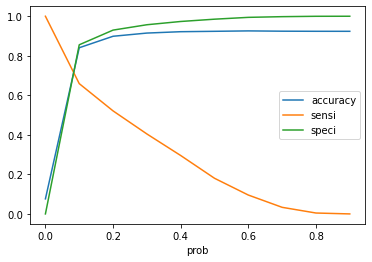

In [125]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [126]:
y_test_pred_xg_1['final_predicted'] = y_test_pred_xg_1.churn_prob.map( lambda x: 1 if x > 0.1 else 0)


# Let's check the overall accuracy.

metrics.accuracy_score(y_test_pred_xg_1.churn, y_test_pred_xg_1.final_predicted)


# Let's take a look at the confusion matrix again 

confusion = metrics.confusion_matrix(y_test_pred_xg_1.churn, y_test_pred_xg_1.final_predicted )


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Let's see the sensitivity of our logistic regression model

sen = TP / float(TP+FN)
print("Sensitivity = ", sen)

# Let us calculate specificity

spe = TN / float(TN+FP)
print("Specificity = ", spe)

# Calculate false postive rate - predicting churn when customer does not have churned

fp = FP/ float(TN+FP)
print("False Positive rate = ", fp)

Sensitivity =  0.6590909090909091
Specificity =  0.8556069508688586
False Positive rate =  0.1443930491311414


In [127]:
confusion

array([[6844, 1155],
       [ 225,  435]], dtype=int64)

### Now for finding the top features we will go ahead with Random forest as it will give us top features and also it's importance.

## Random Forest

In [128]:
# importing the necessary library

from sklearn.ensemble import RandomForestClassifier

In [129]:
# creating random forest object

rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

#### Let's select top 25 features using RFE

In [148]:
from sklearn.feature_selection import RFE
rfe = RFE(rf, 25)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [150]:
# Let's see the top 25 features

list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('circle_id', False, 44),
 ('arpu_6', False, 41),
 ('arpu_7', False, 4),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 19),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 29),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', False, 17),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_mou_6', True, 1),
 ('loc_og_mou_7', True, 1),
 ('loc_og_mou_8', True, 1),
 ('std_og_mou_6', True, 1),
 ('std_og_mou_7', True, 1),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_6', False, 15),
 ('isd_og_mou_7', False, 21),
 ('isd_og_mou_8', False, 12),
 ('spl_og_mou_6', False, 18),
 ('spl_og_mou_7', True, 1),
 ('spl_og_mou_8', False, 20),
 ('og_others_6', False, 27),
 ('og_others_7', False, 32),
 ('og_others_8', False, 34),
 ('loc_ic_mou_6', True, 1),
 ('loc_ic_mou_7', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_mou_6', False, 43),
 ('std_ic_mo

In [151]:
col = X_train_scaled.columns[rfe.support_]

In [152]:
X_train_rfe = X_train_scaled[col]

In [153]:
X_train_rfe.shape

(20202, 25)

In [154]:
# fitting the model

rf.fit(X_train_rfe, y_train)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [155]:
# Out of bag score

rf.oob_score_

0.93005643005643

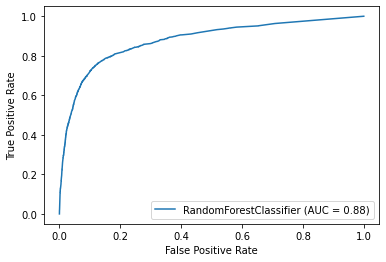

In [157]:
# Plotting the roc_auc_curve

from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, X_train_rfe, y_train)
plt.show()

#### Let's tune the hyperparameter now for better results

In [158]:
rf_1 = RandomForestClassifier(random_state=42, n_jobs=-1)

In [159]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [160]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf_1,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [161]:
grid_search.fit(X_train_rfe, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  6.7min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [162]:
grid_search.best_score_

0.9321849321849323

In [163]:
# getting the best estimator after tuning

rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

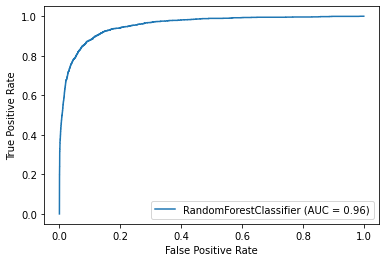

In [165]:
plot_roc_curve(rf_best, X_train_rfe, y_train)
plt.show()

In [166]:
rf_best.feature_importances_

array([0.07048468, 0.02029003, 0.02865373, 0.01773848, 0.02046651,
       0.03218507, 0.01622042, 0.05693578, 0.01955353, 0.04506741,
       0.0194664 , 0.02373799, 0.10278526, 0.02775486, 0.02936778,
       0.02170371, 0.01919352, 0.02364875, 0.02963624, 0.21998151,
       0.0368879 , 0.02199312, 0.04740977, 0.02037795, 0.02845961])

In [168]:
# creating dataframe of imprtant features

imp_df = pd.DataFrame({
    "Varname": X_train_rfe.columns,
    "Imp": rf_best.feature_importances_
})

In [169]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
19,loc_ic_mou_8,0.219982
12,loc_og_mou_8,0.102785
0,arpu_8,0.070485
7,roam_ic_mou_8,0.056936
22,total_rech_amt_8,0.047410
9,roam_og_mou_8,0.045067
20,std_ic_mou_8,0.036888
5,offnet_mou_8,0.032185
18,loc_ic_mou_7,0.029636
14,std_og_mou_7,0.029368


As we can see from the above table that top 8 features are from the 8th month, i.e. action phase

- loc_ic_mou_8
- loc_og_mou_8
- arpu_8
- roam_ic_mou_8
- total_rech_amt_8
- roam_og_mou_8
- std_ic_mou_8
- offnet_mou_8

Company needs to look into the local incoming and outgoing minutes in the 8th month and also the average revenue per user in the 8th month as these are the top 3 features. This will help them in retaining the customers who are not using the service frequently. Company needs to focus more on the local customers as they are more likely to churn.

### Strategies to prevent customer churn

1. Targeted intervention such as providing discounted offers for local customers.
2. Advertising some special offers for local customers.
3. Offering a better roaming price which would motivate the customers to stick with the service.